In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('../../data/Metro_Interstate_Traffic_Volume.csv')

In [58]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [59]:
df.shape

(48204, 9)

In [60]:
df['date_time'] = pd.to_datetime(df['date_time'])



In [61]:
df = df.drop_duplicates(subset='date_time',ignore_index=True)

In [62]:
df.shape

(40575, 9)

In [63]:
print(df['date_time'].min())
print(df['date_time'].max())

2012-10-02 09:00:00
2018-09-30 23:00:00


In [64]:
date_range = list(pd.date_range('2012-10-02 09:00:00','2018-09-30 23:00:00',freq='H'))
print(len(date_range))

52551


In [65]:
new_df = pd.DataFrame({'date_time':date_range})
new_df.head()

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


In [66]:
full_df = pd.merge(new_df,df,how='left',on='date_time')

In [67]:
full_df.shape

(52551, 9)

In [68]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,5545.0
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,4516.0
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,4767.0
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,5026.0
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,4918.0


In [69]:
full_df.isna().sum()

date_time                  0
holiday                11976
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
traffic_volume         11976
dtype: int64

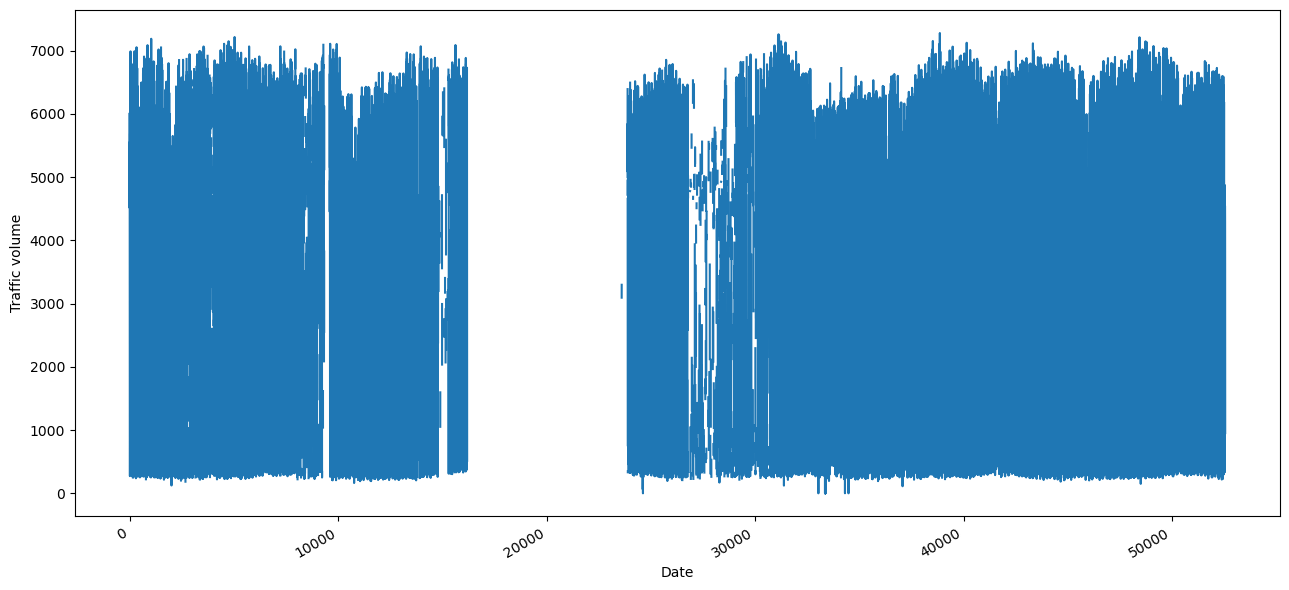

In [71]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [72]:
full_df[35000:].isna().sum()

date_time                0
holiday                104
temp                   104
rain_1h                104
snow_1h                104
clouds_all             104
weather_main           104
weather_description    104
traffic_volume         104
dtype: int64

In [73]:
full_df = full_df[35000:].reset_index(drop=True)

In [74]:
full_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2016-09-29 17:00:00,None,291.75,0.0,0.0,0.0,Clear,Sky is Clear,5551.0
1,2016-09-29 18:00:00,None,290.36,0.0,0.0,0.0,Clear,Sky is Clear,4132.0
2,2016-09-29 19:00:00,None,287.86,0.0,0.0,0.0,Clear,Sky is Clear,3435.0
3,2016-09-29 20:00:00,None,285.91,0.0,0.0,0.0,Clear,Sky is Clear,2765.0
4,2016-09-29 21:00:00,None,284.31,0.0,0.0,0.0,Clear,Sky is Clear,2443.0


In [81]:
full_df.drop(['holiday','weather_main','weather_description'],inplace=True, axis=1, errors='ignore')
full_df.shape

(17551, 6)

In [84]:
full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'),inplace=True)

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_2450/271399442.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  full_df.fillna(full_df.groupby(full_df.date_time.dt.hour).transform('median'),inplace=True)


In [85]:
full_df.isna().sum()

date_time         0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
traffic_volume    0
dtype: int64

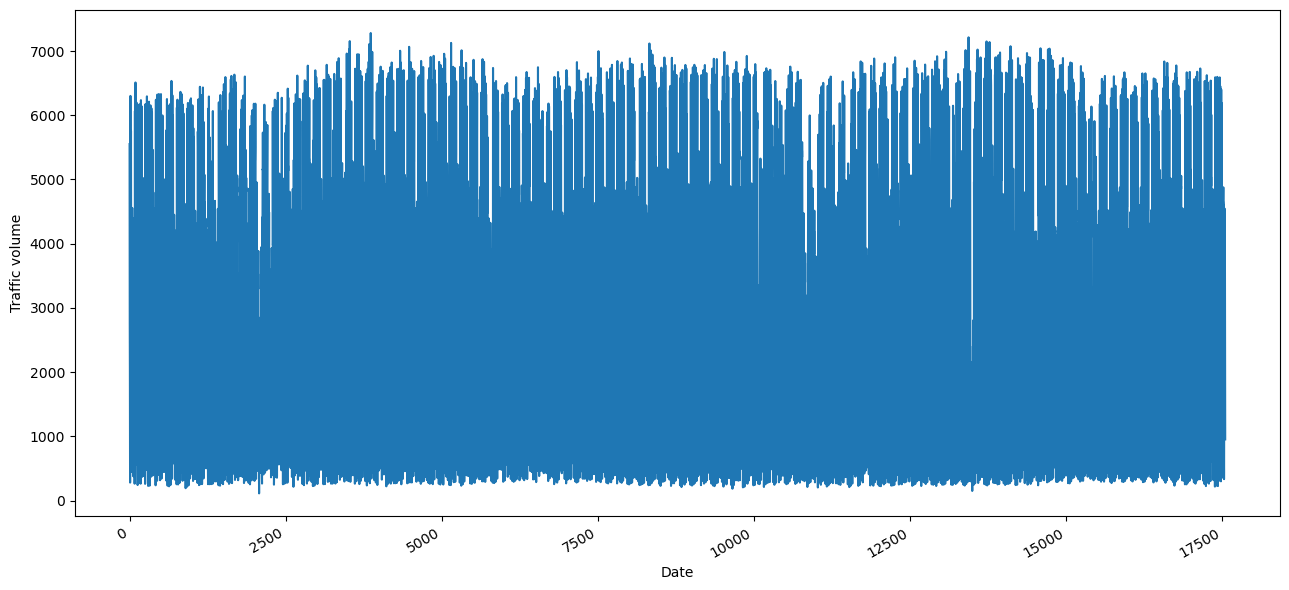

In [86]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(full_df.traffic_volume)
ax.set_xlabel('Date')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

In [87]:
full_df.to_csv('metro_interstate_traffic_volume_preprocessed.csv', index=False, header=True)